In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [4]:
v_NaOH_list = [0, 0.005, 0.010, 0.015, 0.018, 0.020, 0.022, 0.025, 0.030, 0.035, 0.040]

def calc_values(c_HCl = 0.1, v_HCl = 0.02, c_NaOH = 0.1, v_NaOH = v_NaOH_list):
    n_HCl =  c_HCl * v_HCl
    pH_list = []
    for v in v_NaOH:
        new_n_NaOH = c_NaOH * v
        v_ges = v_HCl + v

        if n_HCl > new_n_NaOH:
            new_n_HCl = n_HCl - new_n_NaOH

            c_ges = new_n_HCl / v_ges

            pH = -math.log10(c_ges)

        elif n_HCl < new_n_NaOH:
            new_n_NaOH = new_n_NaOH - n_HCl

            c_ges = new_n_NaOH / v_ges

            pOH = -math.log10(c_ges)

            pH = 14 - pOH

        else:
            # pH = (pKs(H2O) - math.log10(n(H2O))) / 2
            pH = (15.74 - math.log10(1000 / 18)) / 2


        pH_list.append(pH)
        
    return pH_list

In [39]:
def show_plot(*args, **kwargs):
    fig, ax = plt.subplots()
    ax.set_ylim([-1, 15]) 
    y_ticks = np.arange(-1, 15, 1)
    ax.set_yticks(y_ticks)

    for x, y, c_HCl, v_HCl, c_NaOH in args:
        ax.plot(x, y, **kwargs, linestyle='--',
                                marker='o', 
                                label=f"c(HCl)={c_HCl}\nv(HCl)={v_HCl}\nc(NaOH)={c_NaOH}")
    
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel("v(NaOH) [mL]")
    plt.ylabel("pH")
    plt.title("Titration curve")
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.show()

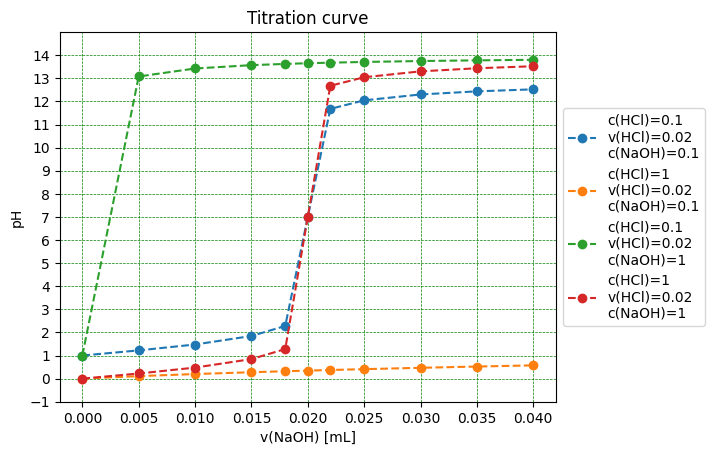

In [40]:
c_HCl_1, v_HCl_1, c_NaOH_1 = 0.1, 0.02, 0.1
c_HCl_2, v_HCl_2, c_NaOH_2 = 1, 0.02, 0.1
c_HCl_3, v_HCl_3, c_NaOH_3 = 0.1, 0.02, 1
c_HCl_4, v_HCl_4, c_NaOH_4 = 1, 0.02, 1

show_plot((v_NaOH_list, calc_values(c_HCl_1, v_HCl_1, c_NaOH_1), c_HCl_1, v_HCl_1, c_NaOH_1),
          (v_NaOH_list, calc_values(c_HCl_2, v_HCl_2, c_NaOH_2), c_HCl_2, v_HCl_2, c_NaOH_2),
          (v_NaOH_list, calc_values(c_HCl_3, v_HCl_3, c_NaOH_3), c_HCl_3, v_HCl_3, c_NaOH_3),
          (v_NaOH_list, calc_values(c_HCl_4, v_HCl_4, c_NaOH_4), c_HCl_4, v_HCl_4, c_NaOH_4))